# Cognitive DV clustering using EFA and Hierachical clustering
This notebook contains outdated data-driven ontology discovery for cognition based on cognitive tasks in the ABCD dataset. This involves two steps:
1. performing exploratory factor analysis on cogntive task DVs to reduce dimensionality (data-drive approach)
2. applying hierarchical clustering and dendrograms to visualize the relationship between DVs within and across clusters

The code is adapted from: https://github.com/IanEisenberg/Self_Regulation_Ontology

In [ ]:
from rpy2.robjects.packages import importr
import rpy2.robjects
from rpy2.robjects import pandas2ri, Formula
from rpy2.robjects.vectors import FloatVector, IntVector
pandas2ri.activate()
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_hex
from matplotlib import text as mtext
from scipy.cluster.hierarchy import dendrogram
from scipy.spatial.distance import pdist, squareform
from scipy.cluster.hierarchy import leaves_list, linkage
%matplotlib inline
import seaborn as sns
import math
from math import ceil
from collections import OrderedDict as odict
from varclushi import VarClusHi

In [2]:
psych = importr('psych')
GPArotation = importr('GPArotation')
stats = importr('stats')
dynamicTreeCut = importr('dynamicTreeCut')
missForest = importr('missForest')

In [3]:
pandas2ri.activate()

In [58]:
filepath_data = '/Users/clarewalker/Desktop/ABCD/derived/data_meaningful.csv'

In [59]:
data = pd.read_csv(filepath_data)
dvs = data.iloc[:,1:].copy()

In [ ]:
varclus = VarClusHi(dvs, maxeigval2=1, maxclus=7)
varclus.varclus()
varclus.info
varclus.rsquare

In [56]:
calc_eigenvalues(dvs)

,Eigenvalue
1,4.53
2,2.22
3,2.00
4,1.87
5,1.69
6,1.48
7,1.42
8,1.30
9,1.27
10,1.11


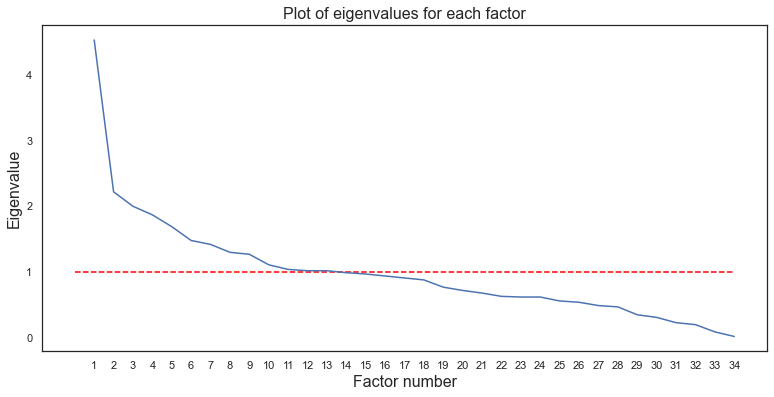

In [54]:
plot_eigenvalues(dvs, thresh=1)

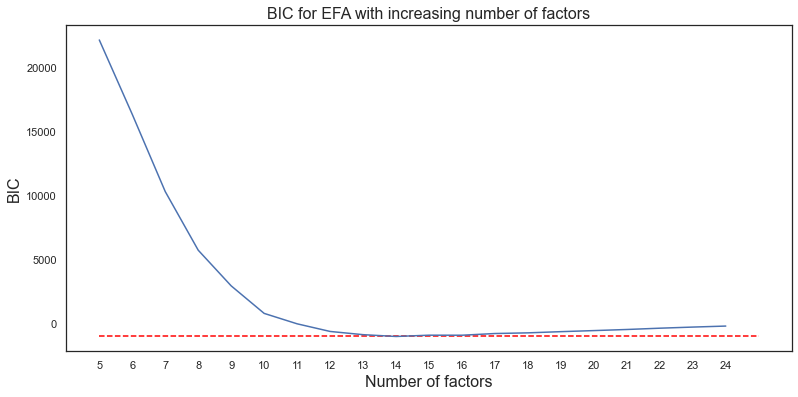

In [55]:
plot_BIC(5, 25, dvs)

In [ ]:
factor_labels = ['Working Memory', 'General Intelligence', 'Temporal Discounting', 'Memory Encoding', 'Cognitive Control', 'Visuospatial PT', 'Motivation', 'Motor PT', 'Visuospatial Caution', 'Motor Impulse Control']

In [64]:
n = 14

fa = fit_EFA(dvs, n)
loading = get_loading(fa, df=dvs, factors=n)
#loading.columns = factor_labels

(array([ 0.5,  1.5,  2.5,  3.5,  4.5,  5.5,  6.5,  7.5,  8.5,  9.5, 10.5,
        11.5, 12.5, 13.5]),
 [Text(0.5, 0, '0'),
  Text(1.5, 0, '1'),
  Text(2.5, 0, '2'),
  Text(3.5, 0, '3'),
  Text(4.5, 0, '4'),
  Text(5.5, 0, '5'),
  Text(6.5, 0, '6'),
  Text(7.5, 0, '7'),
  Text(8.5, 0, '8'),
  Text(9.5, 0, '9'),
  Text(10.5, 0, '10'),
  Text(11.5, 0, '11'),
  Text(12.5, 0, '12'),
  Text(13.5, 0, '13')])

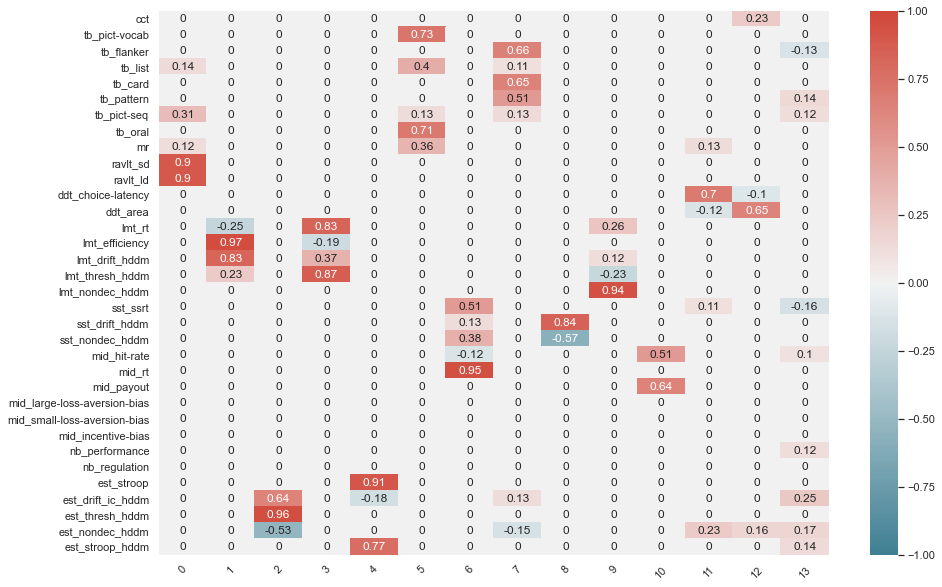

In [65]:
thresh =0.1
loading = pd.DataFrame(np.where(abs(loading)>thresh, loading, 0), index=loading.index)
f, ax = plt.subplots(figsize=(15, 10))
sns.set_theme(style="white")
sns.heatmap(loading, annot = True, cmap=sns.diverging_palette(220,15,n=100,as_cmap=True), vmin=-1, vmax=1)
plt.xticks(rotation=45)

In [213]:
scores = pd.DataFrame(get_attr(fa, "scores"), index=data.subject)

In [214]:
scores.columns = factor_labels

In [151]:
scores.head()

,Working Memory,General Intelligence,Temporal Discounting,Long Memory,Cognitive Control,Visuospatial Processing Time,Motivation,Motor Processing Time,Visuospatial Caution,Motor Impulsivity
subject,,,,,,,,,,
NDAR_INV65X59CTR,0.010787,-0.745063,-1.052461,0.326117,0.618788,0.223802,-0.644425,-0.750172,-0.064652,-0.159153
NDAR_INV6X9N1DLT,-0.462153,-1.222815,-0.010380,-0.180020,-0.414837,0.094156,-0.692237,1.439357,-0.365312,0.592851
NDAR_INV72MPGEWD,0.316166,0.400694,-1.450435,0.546839,-1.199420,0.641734,1.007846,-2.316368,0.918730,-1.431403
NDAR_INV75RKEU4Z,1.098968,1.821927,0.875756,1.092382,0.557579,-0.494934,0.971999,-0.922650,0.942064,-1.078382
NDAR_INV7CBUV9AY,-1.838614,-0.099658,0.504386,-1.193240,0.909338,0.445127,-0.831344,-0.177764,0.007523,-0.339032


In [152]:
scores.to_csv('/Users/clarewalker/Desktop/ABCD/scores.csv', index_label=False)

In [50]:
temp = dvs.fillna(value=0)

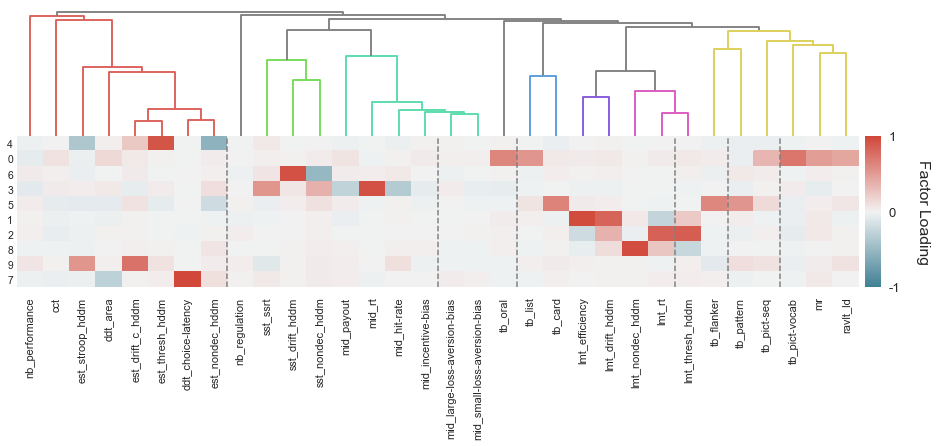

In [51]:
clustering = hierarchical_cluster(temp.T)
loading = get_loading(fa=fa, df=temp, factors=10)
loading = get_ordered_loading(loading, clustering)
_ = plot_dendrogram(loading, clustering, size=15)

In [169]:
clustering['cluster_names'] = factor_labels

In [5]:
def get_attr(fa, attr):
        try:
            index = list(fa.names).index(attr)
            val = list(fa.items())[index][1]
            if len(val) == 1:
                val = val[0]
            if type(val)==rpy2.robjects.vectors.Matrix:
                val = np.matrix(val)
            return val
        except ValueError:
            print('Did not pass a valid attribute')

# plots pairs of histograms for DVs before and after imputation
def compare_dbns(df, df_imputed):
    df_imputed=subset_clean.add_suffix('_imputed')
    joined = pd.concat([df, df_imputed.set_index(df.index)], axis=1)
    for col in df.columns:
        joined.hist(column=[col, col+'_imputed']) 

# zscore all columns in df
def zscore(df):
    df_z = pd.DataFrame()
    cols = df.columns
    for col in cols:
        df_z[col] = (df[col] - np.nanmean(df[col])) / np.nanstd(df[col])
    
    return df_z

def calc_BIC(nmin, nmax, df):
    BICS = []
    factors = list(range(nmin, nmax))
    for n in factors:
        fa = fit_EFA(df, n)
        BIC = get_attr(fa, 'BIC')
        BICS.append(BIC)
    
    return BICS

def calc_eigenvalues(df):
    fa = fit_EFA(df, 10)
    eigens = get_attr(fa, 'e.values')
    eigens = [round(e, 2) for e in eigens]
    eigens = pd.DataFrame(eigens)
    eigens.index += 1
    eigens.columns = ['Eigenvalue']
    
    return eigens

def plot_BIC(nmin, nmax, df):
    BICS = calc_BIC(nmin, nmax, df)
    factors = list(range(nmin, nmax))
    
    f, ax = plt.subplots(figsize=(13, 6))
    plt.xlabel('Number of factors', fontsize=16)
    plt.ylabel('BIC', fontsize=16)
    plt.title('BIC for EFA with increasing number of factors', fontsize=16)
    plt.xticks(np.arange(min(factors), max(factors)+1, 1.0))
    plt.hlines(y=min(BICS), xmin=nmin, xmax=nmax, linestyles='dashed', colors='red')
    plt.plot(factors, BICS)


def plot_eigenvalues(df, thresh=1):
    eigens = calc_eigenvalues(df)
    factors = list(range(1, df.shape[1]+1))
    
    f, ax = plt.subplots(figsize=(13, 6))
    plt.xlabel('Factor number', fontsize=16)
    plt.ylabel('Eigenvalue', fontsize=16)
    plt.title('Plot of eigenvalues for each factor', fontsize=16)
    plt.xticks(np.arange(min(factors), max(factors)+1, 1.0))
    plt.hlines(y=thresh, xmin=0, xmax=df.shape[1], linestyles='dashed', colors='red')
    plt.plot(factors, eigens)

def fit_EFA(df, factors):
    fa = psych.fa(df, factors, rotate='oblimin', fm='ml', scores='tenBerge')
    return fa

def get_loading(fa, df, factors):
    if not fa:
        fa = fit_EFA(df, factors)
    
    return pd.DataFrame(get_attr(fa, 'loadings'), index=df.columns)

def get_scores(fa, df, factors, data):
    if not fa:
        fa = fit_EFA(df, factors)
    
    return pd.DataFrame(get_attr(fa, 'scores'), index=data.subject)

def get_communalities(fa, df, factors):
    if not fa:
        fa = fit_EFA(df, factors)
    
    return pd.DataFrame(np.transpose(get_attr(fa, 'communalities')), index=df.columns)

def plot_EFA_heatmap(fa, df, factors, thresh=None, cmap="mako", figsize=(15,10)):
    loading = get_loading(fa, df, factors)
    if thresh:
        loading = pd.DataFrame(np.where(abs(loading)>thresh, loading, 0), index=loading.index)
    
    f, ax = plt.subplots(figsize=(15, 10))
    sns.heatmap(loading, annot = True, cmap=cmap)

In [6]:
def get_ordered_loading(loading, clustering):
    c = loading.shape[1]
    DVs = clustering['clustered_df'].index
    reorder_vec = clustering['reorder_vec']
    cluster_labels = clustering['labels'][reorder_vec]
    cluster_DVs= [[DVs[i] for i,index in enumerate(cluster_labels) if index == j] for j in np.unique(cluster_labels)]
    num_clusters = np.max(cluster_labels)
    names = [str(i+1) for i in range(num_clusters)]
    cluster_DVs_dict = odict()
    for name, dv in zip(names, cluster_DVs):
        cluster_DVs_dict[name] = dv

    cluster_loadings = odict({})
    for name, cluster in cluster_DVs_dict.items():
        subset = abs(loading.loc[cluster,:])
        cluster_vec = subset.mean(0)
        cluster_loadings[name] = cluster_vec
    loading_order = []
    i = 0
    while len(loading_order) < c and i < len(names):
        cluster_loading = cluster_loadings[names[i]]
        top_factor = cluster_loading.idxmax()
        if top_factor not in loading_order:
            loading_order.append(top_factor)
        i+=1
    loading_order += list(set(loading.columns)-set(loading_order))
    loading = loading.loc[:, loading_order]  
    
    return loading

def plot_dendrogram(loading, clustering, title=None, 
                    break_lines=True, drop_list=None, double_drop_list=None,
                    absolute_loading=False,  size=4.6,  dpi=300, 
                    filename=None):
    """ Plots HCA results as dendrogram with loadings underneath
    
    Args:
        loading: pandas df, a results EFA loading matrix
        clustering: pandas df, a results HCA clustering
        title (optional): str, title to plot
        break_lines: whether to separate EFA heatmap based on clusters, default=True
        drop_list (optional): list of cluster indices to drop the cluster label
        drop_list (optional): list of cluster indices to drop the cluster label twice
        absolute_loading: whether to plot the absolute loading value, default False
        plot_dir: if set, where to save the plot
        
    """


    c = loading.shape[1]
    # extract cluster vars
    link = clustering['linkage']
    DVs = clustering['clustered_df'].columns
    ordered_loading = loading.loc[DVs]
    if absolute_loading:
        ordered_loading = abs(ordered_loading)
    # get cluster sizes
    labels=clustering['labels']
    cluster_sizes = [np.sum(labels==(i+1)) for i in range(max(labels))]
    link_function, colors = get_dendrogram_color_fun(link, clustering['reorder_vec'],
                                                     labels)
    
    # set figure properties
    figsize = (size, size*.4)
    # set up axes' size 
    heatmap_height = ordered_loading.shape[1]*.035
    heat_size = [.1, heatmap_height]
    dendro_size=[np.sum(heat_size), .3]
    # set up plot axes
    dendro_size = [.15,dendro_size[0], .78, dendro_size[1]]
    heatmap_size = [.15,heat_size[0],.78,heat_size[1]]
    cbar_size = [.935,heat_size[0],.015,heat_size[1]]
    ordered_loading = ordered_loading.T

    with sns.axes_style('white'):
        fig = plt.figure(figsize=figsize)
        ax1 = fig.add_axes(dendro_size) 
        # **********************************
        # plot dendrogram
        # **********************************
        with plt.rc_context({'lines.linewidth': size*.125}):
            dendrogram(link, ax=ax1, link_color_func=link_function,
                       orientation='top')
        # change axis properties
        ax1.tick_params(axis='x', which='major', labelsize=14,
                        labelbottom=False)
        ax1.get_yaxis().set_visible(False)
        ax1.spines['top'].set_visible(False)
        ax1.spines['right'].set_visible(False)
        ax1.spines['bottom'].set_visible(False)
        ax1.spines['left'].set_visible(False)
        # **********************************
        # plot loadings as heatmap below
         # **********************************
        ax2 = fig.add_axes(heatmap_size)
        cbar_ax = fig.add_axes(cbar_size)
        max_val = np.max(abs(loading.values))
        # bring to closest .25
        max_val = ceil(max_val*4)/4
        sns.heatmap(ordered_loading, ax=ax2, 
                    cbar=True, cbar_ax=cbar_ax,
                    yticklabels=True,
                    xticklabels=True,
                    vmax =  1, vmin = -1,
                    cbar_kws={'orientation': 'vertical',
                              'ticks': [-1, 0, 1]},
                    cmap=sns.diverging_palette(220,15,n=100,as_cmap=True))
        ax2.set_yticklabels(ax2.get_yticklabels(), rotation=0)
        ax2.tick_params(axis='y', labelsize=size*heat_size[1]*20/c, pad=size/4, length=0)            
        # format cbar axis
        cbar_ax.set_yticklabels([-1, 0, 1])
        cbar_ax.tick_params(labelsize=size*heat_size[1]*25/c, length=0, pad=size/2)
        cbar_ax.set_ylabel('Factor Loading', rotation=-90, 
                       fontsize=size*heat_size[1]*30/c, labelpad=size*2)
        # add lines to heatmap to distinguish clusters
        if break_lines == True:
            xlim = ax2.get_xlim(); 
            ylim = ax2.get_ylim()
            step = xlim[1]/len(labels)
            cluster_breaks = [i*step for i in np.cumsum(cluster_sizes)]
            ax2.vlines(cluster_breaks[:-1], ylim[0], ylim[1], linestyles='dashed',
                       linewidth=size*.1, colors=[.5,.5,.5], zorder=10)
        # **********************************
        # plot cluster names
        # **********************************
        beginnings = np.hstack([[0],np.cumsum(cluster_sizes)[:-1]])
        centers = beginnings+np.array(cluster_sizes)//2+.5
        offset = .07
        if 'cluster_names' in clustering.keys():
            ax2.tick_params(axis='x', reset=True, top=False, bottom=False, width=size/8, length=0)
            names = [transform_name(i) for i in clustering['cluster_names']]
            ax2.set_xticks(centers)
            ax2.set_xticklabels(names, rotation=0, ha='center', 
                                fontsize=heatmap_size[2]*size*1)
            ticks = ax2.xaxis.get_ticklines()[::2]
            for i, label in enumerate(ax2.get_xticklabels()):
                if label.get_text() != '':
                    ax2.hlines(c+offset,beginnings[i]+.5,beginnings[i]+cluster_sizes[i]-.5, 
                               clip_on=False, color=colors[i], linewidth=size/5)
                    label.set_color(colors[i])
                    ticks[i].set_color(colors[i])
                    y_drop = .005
                    line_drop = .3
                    if drop_list and i in drop_list:
                        y_drop = .05
                        line_drop = 1.6
                    if double_drop_list and i in double_drop_list:
                        y_drop = .1
                        line_drop = 2.9
                    label.set_y(-(y_drop/heatmap_height+heatmap_height/c*offset))
                    ax2.vlines(beginnings[i]+cluster_sizes[i]/2, 
                               c+offset, c+offset+line_drop,
                               clip_on=False, color=colors[i], 
                               linewidth=size/7.5)

        # add title
        if title:
            ax1.set_title(title, fontsize=size*2, y=1.05)
            
    if filename is not None:
        save_figure(fig, filename,
                    {'bbox_inches': 'tight', 'dpi': dpi})
        plt.close()
    else:
        return fig
    
def get_dendrogram_color_fun(Z, labels, clusters, color_palette=sns.hls_palette):
    """ return the color function for a dendrogram
    
    ref: https://stackoverflow.com/questions/38153829/custom-cluster-colors-of-scipy-dendrogram-in-python-link-color-func
    Args:
        Z: linkage 
        Labels: list of labels in the order of the dendrogram. They should be
            the index of the original clustered list. I.E. [0,3,1,2] would
            be the labels list - the original list reordered to the order of the leaves
        clusters: cluster assignments for the labels in the original order
    
    """
    dflt_col = "#808080" # Unclustered gray
    color_palette = color_palette(len(np.unique(clusters)))
    D_leaf_colors = {i: to_hex(color_palette[clusters[i]-1]) for i in labels}
    # notes:
    # * rows in Z correspond to "inverted U" links that connect clusters
    # * rows are ordered by increasing distance
    # * if the colors of the connected clusters match, use that color for link
    link_cols = {}
    for i, i12 in enumerate(Z[:,:2].astype(int)):
        c1, c2 = (link_cols[x] if x > len(Z) else D_leaf_colors[x] for x in i12)
        link_cols[i+1+len(Z)] = c1 if c1 == c2 else dflt_col
    return lambda x: link_cols[x], color_palette

def format_num(num, digits=2):
    def format(num):
        if num%1 != 0:
            formatted = ("{0:0." + str(digits) + "f}").format(num)
        else:
            formatted =  ("{0:0." + str(0) + "f}").format(num)
        return formatted
    try:
        return [format(i) for i in num]
    except TypeError:
        return format(num)

In [7]:
def get_size(length): # solve n(n-1)/2 = len(dist)
    return (1 + math.sqrt(1 + 8*length)) / 2

def dynamicTreeCutFunc(distance_df, func='hybrid', method='average', **cluster_kws):
    """ uses DynamicTreeCut to find clusters
    Args:
        method = "hybrid" or "dyanmic":
    """
    stats = importr('stats')
    dynamicTreeCut = importr('dynamicTreeCut')
    dist = stats.as_dist(distance_df)
    dist_r = FloatVector(dist)
    dist_r.slots['Size'] = get_size(dist.shape[0])
    link = stats.hclust(dist_r, method=method)
    if func == 'hybrid':
        clustering = dynamicTreeCut.cutreeHybrid(link, distance_df, **cluster_kws)
        return np.array(clustering[0])
    elif func == 'dynamic':
        clustering = dynamicTreeCut.cutreeDynamic(link, **cluster_kws)
        return np.array(clustering)
    
def distcorr(X, Y, flip=True):
    """ Compute the distance correlation function
    
    >>> a = [1,2,3,4,5]
    >>> b = np.array([1,2,9,4,4])
    >>> distcorr(a, b)
    0.762676242417
    
    Taken from: https://gist.github.com/satra/aa3d19a12b74e9ab7941
    """
    X = np.atleast_1d(X)
    Y = np.atleast_1d(Y)
    if np.prod(X.shape) == len(X):
        X = X[:, None]
    if np.prod(Y.shape) == len(Y):
        Y = Y[:, None]
    X = np.atleast_2d(X)
    Y = np.atleast_2d(Y)
    n = X.shape[0]
    if Y.shape[0] != X.shape[0]:
        raise ValueError('Number of samples must match')
    a = squareform(pdist(X))
    b = squareform(pdist(Y))
    A = a - a.mean(axis=0)[None, :] - a.mean(axis=1)[:, None] + a.mean()
    B = b - b.mean(axis=0)[None, :] - b.mean(axis=1)[:, None] + b.mean()
    
    dcov2_xy = (A * B).sum()/float(n * n)
    dcov2_xx = (A * A).sum()/float(n * n)
    dcov2_yy = (B * B).sum()/float(n * n)
    dcor = np.sqrt(dcov2_xy)/np.sqrt(np.sqrt(dcov2_xx) * np.sqrt(dcov2_yy))
    if flip == True:
        dcor = 1-dcor
    return dcor

def abs_pdist(mat, square=False):
    correlation_dist = pdist(mat, metric='correlation')
    correlations = 1-correlation_dist
    absolute_distance = 1-abs(correlations)
    if square == True:
        absolute_distance = squareform(absolute_distance)
    return absolute_distance

def shorten_labels(labels, conversions={}):
    lookup = []
    new_labels = []
    for label in labels:
        if label in conversions.keys():
            new_label = conversions[label]
        else:
            label.replace('-', ' ')
            new_label = ''.join([l[0:2] for l in label.split(' ')])
        new_labels.append(new_label)
        lookup.append((new_label, label))
    return new_labels, lookup

# ****************************************************************************
# helper functions for hierarchical clustering
# ****************************************************************************
def reorder_labels(labels, link):
    """ reorder labels based on a linkage matrix
    
    reorder labels based on dendrogram position
    reindex so the clusters are in order based on their proximity
    in the dendrogram
    """
    reorder_vec = leaves_list(link)
    cluster_swap = {}
    last_group = 1
    for i in labels[reorder_vec]:
        if i not in cluster_swap.keys():
            cluster_swap[i] = last_group
            last_group += 1
    cluster_reindex = np.array([cluster_swap[i] for i in labels])
    return cluster_reindex
    
def hierarchical_cluster(df, compute_dist=True,  pdist_kws=None, 
                         method='average', min_cluster_size=3,
                         cluster_kws=None):
    """
    plot hierarchical clustering and heatmap
    :df: a correlation matrix
    parse_heatmap: int (optional). If defined, devides the columns of the 
                    heatmap based on cutting the dendrogram
    """
    
    # if compute_dist = False, assume df is a distance matrix. Otherwise
    # compute distance on df rows
    if compute_dist == True:
        if pdist_kws is None:
            pdist_kws= {'metric': 'correlation'}
        if pdist_kws['metric'] == 'abscorrelation':
            # convert to absolute correlations
            dist_vec = abs_pdist(df)
        elif pdist_kws['metric'] == 'sqcorrelation':
            # convert to squared correlations
            dist_vec = squareform(1-df.T.corr()**2)
        else:
            dist_vec = pdist(df, **pdist_kws)
        dist_df = pd.DataFrame(squareform(dist_vec), 
                               index=df.index, 
                               columns=df.index)
    else:
        assert df.shape[0] == df.shape[1]
        dist_df = df
        dist_vec = squareform(df.values)
    #clustering. This works the same as hclust
    link = linkage(dist_vec, method=method)    
    #dendrogram
    # same as order.dendrogram(as.dendrogram(hclust output)) in R
    reorder_vec = leaves_list(link)
    clustered_df = dist_df.iloc[reorder_vec, reorder_vec]
    # clustering
    if cluster_kws is None:
        cluster_kws = {'minClusterSize': 2,
                       'verbose': 0,
                       'pamStage': False}
    labels = dynamicTreeCutFunc(dist_df, func='hybrid', method=method,  **cluster_kws)
    labels = reorder_labels(labels, link)
    return {'linkage': link, 
            'distance_df': dist_df, 
            'clustered_df': clustered_df,
            'reorder_vec': reorder_vec,
            'labels': labels}

In [261]:
import sys
import joblib

sys.modules['sklearn.externals.joblib'] = joblib

In [12]:
import numpy as np
from os import path
import pandas as pd
import readline
import rpy2.robjects
from rpy2.robjects import pandas2ri, Formula
from rpy2.robjects.packages import importr
from SRO.Self_Regulation_Ontology.selfregulation.utils.utils import get_info
pandas2ri.activate()

def missForest(data):
    missForest = importr('missForest')
    data_complete, error = missForest.missForest(data)
    imputed_df = pd.DataFrame(np.matrix(data_complete).T, index=data.index, columns=data.columns)
    return imputed_df, error
    

def GPArotation(data, method='varimax', normalize=True):
    GPArotation = importr('GPArotation')
    rotated_data = GPArotation.GPForth(data.values, method = method, normalize=normalize)[0]
    rotated_data = pd.DataFrame(data = np.matrix(rotated_data), index=data.index, columns=data.columns)
    return rotated_data

def get_Rpsych():
    psych = importr('psych')
    return psych

def get_attr(fa, attr):
        try:
            index = list(fa.names).index(attr)
            val = list(fa.items())[index][1]
            if len(val) == 1:
                val = val[0]
            if type(val)==rpy2.robjects.vectors.Matrix:
                val = np.matrix(val)
            return val
        except ValueError:
            print('Did not pass a valid attribute')
            
def psychFA(data, n_components, return_attrs=['BIC', 'SABIC', 'RMSEA'], 
            rotate='oblimin', method='ml', nobs=0, n_iter=1, verbose=False):
    psych = importr('psych')
    if n_iter==1:
        fa = psych.fa(data, n_components, rotate=rotate, fm=method, n_obs=nobs,
                      scores='tenBerge')
    else:
        assert nobs==0
        fa = psych.fa_sapa(data, n_components, rotate=rotate, fm=method, 
                           scores='tenBerge', n_iter=n_iter, frac=.9)
    # ensure the model isn't ill-specified
    if get_attr(fa, 'dof') > 0:
        attr_dic = {}
        # loadings are the weights of the linear combination between factors and variables
        attr_dic['loadings'] = get_attr(fa, 'loadings')
        # scores are calculated if raw data is passed, rather than a correlation matrix
        if 'scores' in fa.names:
            # scores are the the factors
            attr_dic['scores'] = get_attr(fa, 'scores')
            # weights are the "mixing matrix" such that the final data is
            # S * W
            attr_dic['weights'] = get_attr(fa, 'weights')
        for attr in return_attrs:
            attr_dic[attr] = get_attr(fa, attr)
        if verbose:
            print(fa)
        return fa, attr_dic
    else:
        if verbose:  print('Too few DOF to specify model!')
        return None

def dynamicTreeCut(distance_df, func='hybrid', method='average', **cluster_kws):
    """ uses DynamicTreeCut to find clusters
    Args:
        method = "hybrid" or "dyanmic":
    """
    stats = importr('stats')
    dynamicTreeCut = importr('dynamicTreeCut')
    dist = stats.as_dist(distance_df)
    link = stats.hclust(dist, method=method)
    if func == 'hybrid':
        dist = stats.as_dist(distance_df)
        clustering = dynamicTreeCut.cutreeHybrid(link, distance_df, **cluster_kws)
        return np.array(clustering[0])
    elif func == 'dynamic':
        clustering = dynamicTreeCut.cutreeDynamic(link, **cluster_kws)
        return np.array(clustering)
    
def glmer(data, formula, verbose=False):
    base = importr('base')
    lme4 = importr('lme4')
    rs = lme4.glmer(Formula(formula), data, family = 'binomial')
    
    fixed_effects = lme4.fixed_effects(rs)
    fixed_effects = {k:v for k,v in zip(fixed_effects.names, list(fixed_effects))}
                                  
    random_effects = lme4.random_effects(rs)[0]
    random_effects = pd.DataFrame([list(lst) for lst in random_effects], index = list(random_effects.colnames)).T
    if verbose:
        print(base.summary(rs))
    return fixed_effects, random_effects

def lmer(data, formula, verbose=False):
    base = importr('base')
    lme4 = importr('lme4')
    rs = lme4.lmer(Formula(formula), data)
    
    fixed_effects = lme4.fixed_effects(rs)
    fixed_effects = {k:v for k,v in zip(fixed_effects.names, list(fixed_effects))}
                                  
    random_effects = lme4.random_effects(rs)
    random_df = pd.DataFrame()
    for re in random_effects:
        random_effects = pd.DataFrame([list(lst) for lst in re], index = list(re.colnames)).T
        random_df = pd.concat([random_df, random_effects], axis=1)
    random_variance = pandas2ri.ri2py(base.as_data_frame(lme4.VarCorr_merMod(rs)))
    if verbose:
        print(base.summary(rs))
    return rs, random_variance, fixed_effects, random_df

def M3C(data, ncores=1, iters=100, maxk=20):
    base = importr('base')
    M3C = importr('M3C')
    res = M3C.M3C(data.T, maxK=maxk, distance="abscorr",
                  clusteralg="hc", removeplots=True,
                  cores=ncores, iters=iters)
    k = np.argmax(list(res[1][3]))+2 # k is actuall k+1 because python is zero indexed
    DV_order = list(base.colnames(res[0][k-2][1]))
    labels = pd.Series(np.array(res[0][k-2][2]).squeeze(), index=DV_order)
    consensus_mat = pd.DataFrame(np.matrix(res[0][k-2][0]),
                                index=DV_order, columns=DV_order)
    return consensus_mat, labels, res

def psychICC(df):
    psych = importr('psych')
    rs = psych.ICC(df)
    return rs

def qgraph_cor(data, glasso=False, gamma=.25):
    qgraph = importr('qgraph')
    cors = qgraph.cor_auto(data)
    if glasso==True:
        EBICglasso = qgraph.EBICglasso(cors, data.shape[0],
                                       returnAllResults=True,
                                       gamma=gamma)
        # figure out the index for the lowest EBIC
        best_index = np.argmin(EBICglasso[1])
        tuning_param = EBICglasso[4][best_index]
        glasso_cors = np.array(EBICglasso[0][0])[:,:,best_index]
        glasso_cors_df = pd.DataFrame(np.matrix(glasso_cors), 
                           index=data.columns, 
                           columns=data.columns)
        return glasso_cors_df, tuning_param
    else:
        cors_df = pd.DataFrame(np.matrix(cors), 
                           index=data.columns, 
                           columns=data.columns)
        return cors_df